# **Traer archivos a Colab de forma local**

In [0]:
from google.colab import files
uploaded = files.upload()


Saving MasDatosNu.csv to MasDatosNu.csv


# **Importar Librerías**

In [0]:
#Librería para manipulación y análisis de datos.
import pandas as pd  
#Librería de funciones matemáticas de alto nivel para operar con vectores y matrices.
import numpy as np    
#Librería para la generación de gráficos a partir de datos contenidos en listas o arrays.  
import matplotlib.pyplot as plt    
#mapa de colores generado a partir de una lista de colores.
from matplotlib.colors import ListedColormap  
#Librería de nivel superior a Matplotlib que permite generar fácilmente elegantes gráficos. 
import seaborn as sb      

#dibuja imágenes estáticas en el cuaderno.
%matplotlib inline
#Esto hace que el ancho de la figura sea de 16 de ancho y su altura de 14 pulgadas.
plt.rcParams['figure.figsize'] = (16, 14) 
plt.style.use('ggplot')  #Para crear gráficos declarativamente.
 
#Selección deL modelo, nos permite dividir un dataset en dos bloques (entrenamiento y test del modelo).
from sklearn.model_selection import train_test_split  
#Clasificador que implementa el voto k-vecinos más cercanos.
from sklearn.neighbors import KNeighborsClassifier 
#Crea un informe de texto que muestra las principales métricas de clasificación.
from sklearn.metrics import classification_report
#Calcula la matriz de confusión para evaluar la precisión de una clasificación dentro del modelo.  
from sklearn.metrics import confusion_matrix  
#Estandarizar las características eliminando la media y escalando a la varianza de la unidad. 
from sklearn.preprocessing import StandardScaler 

# **Cargamos el dataset (archivo.csv)**

In [0]:
dataframe = pd.read_csv('MasDatosNu.csv',sep=';', index_col=0) #Leer el archivo de datos con encabezado y separados por punto y comas (csv) en DataFrame.
dataframe.head(10) #Esta función devuelve las primeras 10 filas del dataset.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48,80,1.020,1,0,1,1,0,0,121,36.0,1.2,135.0,4.7,15.4,44,7800,5.2,1,1,0,1,0,0,1
1,5,90,1.015,1,0,1,1,0,0,224,16.0,0.7,138.0,3.2,8.1,23,5000,2.9,0,0,0,1,0,1,1
2,34,70,1.015,4,0,0,0,0,0,153,22.0,0.9,133.0,3.8,9.8,32,6900,3.4,0,0,0,1,1,0,1
3,75,70,1.025,1,0,1,1,0,0,158,49.0,1.4,135.0,4.7,11.1,39,8300,4.6,1,0,0,0,1,0,1
4,5,50,1.010,0,0,1,1,0,0,107,25.0,0.6,141.0,4.2,11.8,36,12400,4.2,0,0,0,1,0,0,1
5,8,50,1.020,4,0,1,1,0,0,95,46.0,1.0,135.0,3.8,9.8,32,6900,3.4,0,0,0,1,1,0,1
6,5,50,1.010,0,0,1,1,0,0,107,25.0,0.6,141.0,4.2,11.8,36,12400,4.2,0,0,0,1,0,0,1
7,73,90,1.010,1,4,0,0,1,0,234,56.0,1.9,133.0,3.9,10.3,28,6200,4.0,0,1,0,1,0,0,1
8,65,80,1.015,2,1,1,1,1,0,215,133.0,2.5,140.0,4.0,13.2,41,11200,3.7,0,1,0,1,0,0,1


# **Resumen estadístico de los datos**

In [0]:
dataframe.info() #visualizar detalles estadísticos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 294
Data columns (total 25 columns):
age               294 non-null int64
bp                294 non-null int64
sg                294 non-null float64
al                294 non-null int64
su                294 non-null int64
rbc               294 non-null int64
pc                294 non-null int64
pcc               294 non-null int64
ba                294 non-null int64
bgr               294 non-null int64
bu                294 non-null float64
sc                294 non-null float64
sod               294 non-null float64
pot               294 non-null float64
hemo              294 non-null float64
pcv               294 non-null int64
wc                294 non-null int64
rc                294 non-null float64
htn               294 non-null int64
dm                294 non-null int64
cad               294 non-null int64
appet             294 non-null int64
pe                294 non-null int64
ane               294 non-null

# **Visualización de los datos**

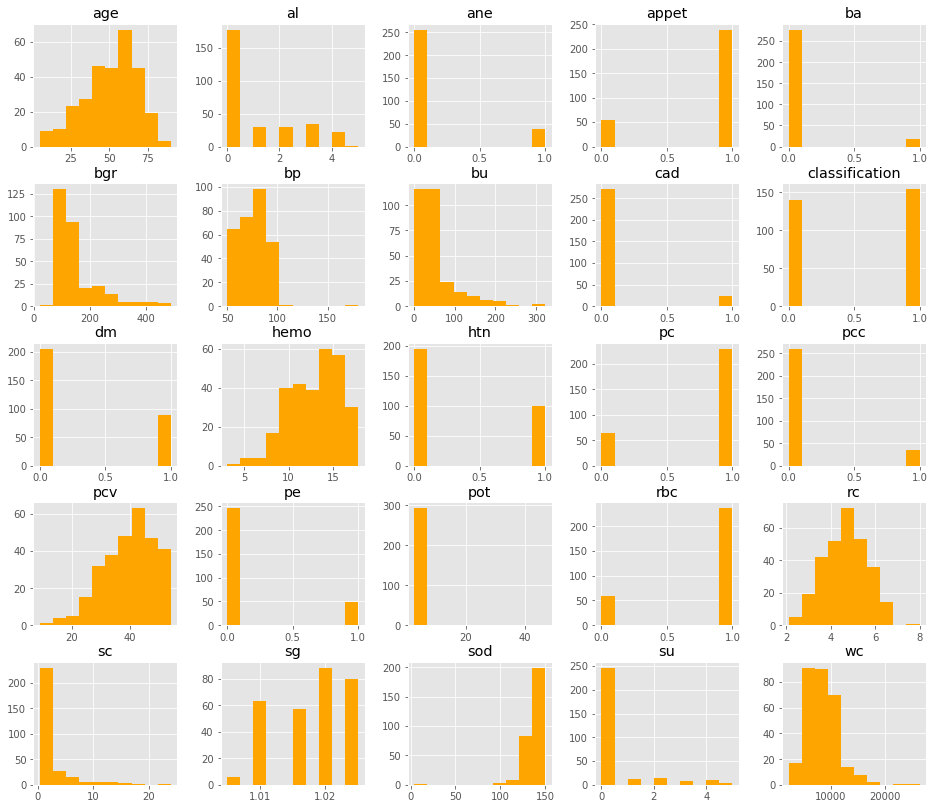

In [0]:
dataframe.hist(color = 'orange') #Trazar histogramas
plt.show() #función para mostrar los histogramas.

In [0]:
	
print(dataframe.groupby('classification').size()) #Dividimos los datos en grupos aplicando algunas condiciones en los conjuntos de datos.

classification
0    140
1    154
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


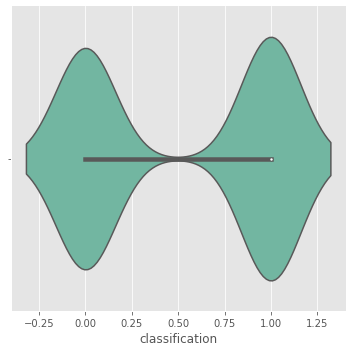

In [0]:
sb.factorplot('classification',data=dataframe,kind="violin",palette="Set2") #Graficamos la variable dependiente.

# **Preparamos las entradas**

In [0]:
#La X representara nuestras columnas independientes.
X = dataframe[['age','bp', 'sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']].values
y = dataframe['classification'].values  #La Y representa nuestra columna dependiente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #Decidimos el tamaño de los datos que se deben dividir como conjunto de datos de prueba

#Estandarizar las variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# **Elegir valor K**

**Comparación de la tasa de error con el valor K**

In [0]:
error = []

# Error de cálculo para valores de K entre 1 y 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

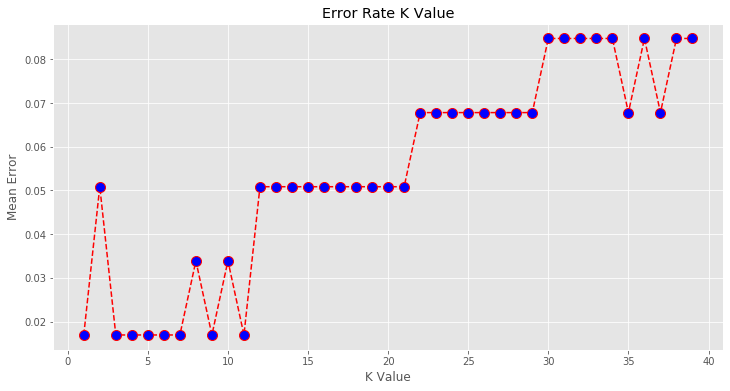

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# **Crear el modelo k-Nearest Neighbor con Scikit Learn**

**1. Entrenar el modelo**

In [0]:
#Inicializamos el clasificador y le asignamos el valor de k (puntos vecinos)
n_neighbors = 21
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train) #Entrenamos el modelo
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.95


**2. Predicciones en el modelo**


In [0]:
pred = knn.predict(X_test) #Hacer predicciones sobre nuestros datos de prueba


# **Matriz de Confusión y Reporte de métricas**

In [0]:
print('Matriz de Confusión')
print(confusion_matrix(y_test, pred)) #imprimimos la matriz de confusión
print('\n')
print('Reporte de Métricas')
print(classification_report(y_test, pred)) #generamos el reporte de métricas de evaluación

Matriz de Confusión
[[33  0]
 [ 3 23]]


Reporte de Métricas
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.94        26

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59

